In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL1BhdHRvblAvc291cmNlL3JlcG9zL3B5c2V0ZXIvZG9jcw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/importlib/_bootstrap.py": 1770271576.99226, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/importlib/_bootstrap_external.py": 1770271576.9868484, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/zipimport.py": 1770271575.0246007, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/codecs.py": 1770271574.443841, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/encodings/aliases.py": 1770271575.7449965, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/encodings/__init__.py": 1770271575.7354684, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/encodings/utf_8.py": 1770271576.3474226, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/abc.py": 1770271574.3327346, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/stat.py": 1770271574.899533, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/_collections_abc.py": 1770271574.2411997, "/Users/PattonP/

In [2]:
import os

from pyseter.extract import FeatureExtractor
from pyseter.sort import load_features
from pyseter.identify import predict_ids
from pyseter.experimental import launch_review
import numpy as np
import pandas as pd

data_dir = '/Users/PattonP/datasets/happywhale/'

In [3]:
# we'll save the results in the feature_dir
feature_dir = data_dir + '/features'
os.makedirs(feature_dir, exist_ok=True)

# initialize the extractor 
fe = FeatureExtractor(batch_size=4)

Using device: mps (Apple Silicon GPU)


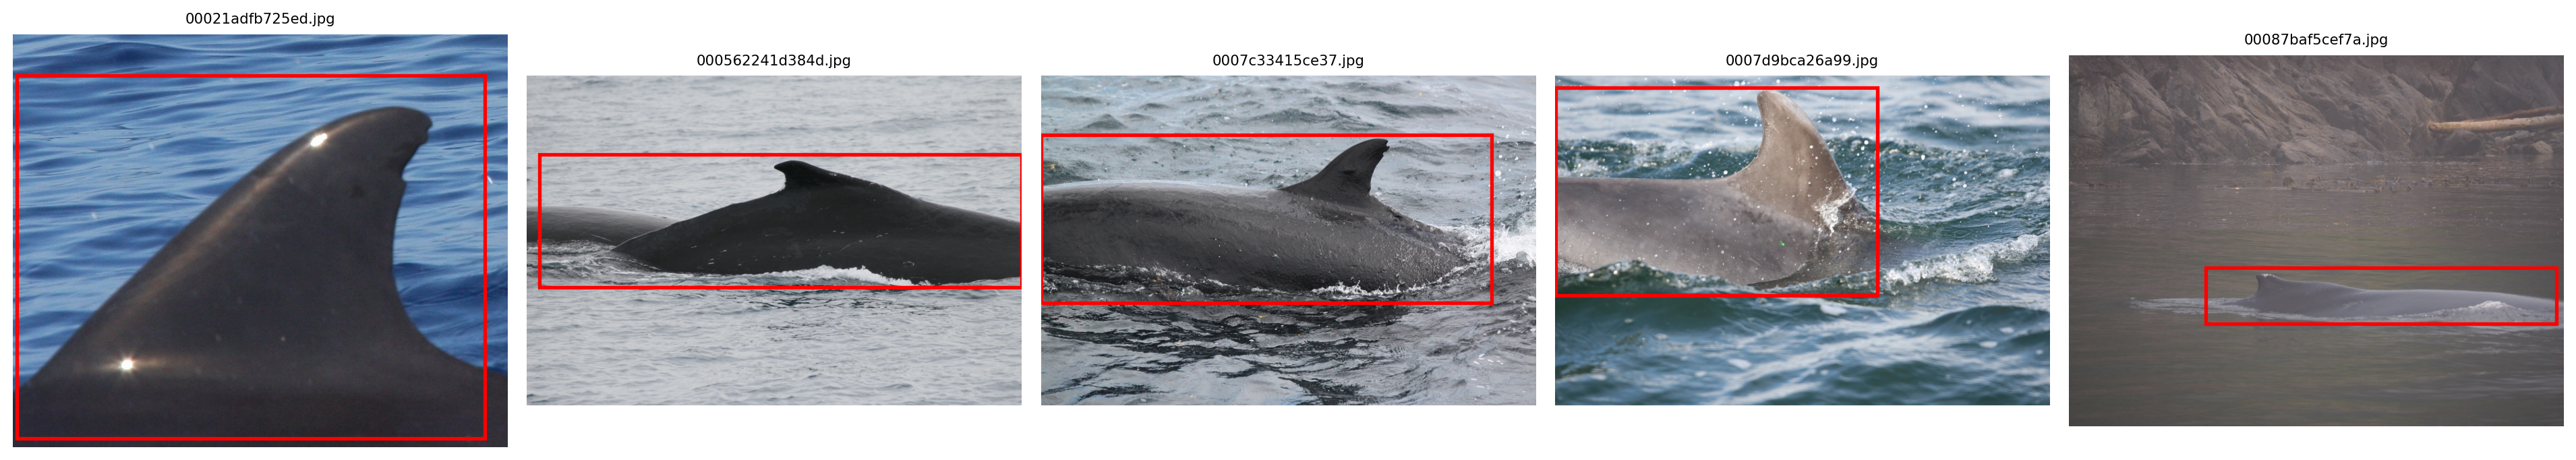

In [4]:
#| echo: false

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision.io import decode_image
import os

def visualize_bboxes(image_dir, bbox_csv, n=5):
    df = pd.read_csv(bbox_csv)
    fig, axes = plt.subplots(1, n, figsize=(4 * n, 4))
    if n == 1: axes = [axes]
    
    for ax, (_, row) in zip(axes, df.head(n).iterrows()):
        img = decode_image(os.path.join(image_dir, row['filename']))
        ax.imshow(img.permute(1, 2, 0))  # CHW -> HWC
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                  linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.set_title(row['filename'], fontsize=8)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
  
visualize_bboxes(
    data_dir + '/train_images',
    'https://raw.githubusercontent.com/philpatton/pyseter/main/data/happywhale-charm-boxes.csv'
)

In [5]:
#| eval: false

bbox_url = 'https://raw.githubusercontent.com/philpatton/pyseter/main/data/happywhale-charm-boxes.csv'

train_dir = data_dir + '/train_images'
train_features = fe.extract(image_dir=train_dir, bbox_csv=bbox_url)

# this saves the dictionary as an numpy file
out_path = feature_dir + '/train_features.npy'
np.save(out_path, train_features)

# now do the test images
test_dir = data_dir + '/test_images'
test_features = fe.extract(image_dir=test_dir, bbox_csv=bbox_url)

out_path = feature_dir + '/test_features.npy'
np.save(out_path, test_features)

In [6]:
reference_path = feature_dir + '/train_features.npy'
reference_files, reference_features = load_features(reference_path)

query_path = feature_dir + '/test_features.npy'
query_files, query_features = load_features(query_path)

In [7]:
query_dict = dict(zip(query_files, query_features))
reference_dict = dict(zip(reference_files, reference_features))

id_df = pd.read_csv(data_dir + '/train.csv')
id_df.head()

image             species individual_id
0  00021adfb725ed.jpg  melon_headed_whale  cadddb1636b9
1  000562241d384d.jpg      humpback_whale  1a71fbb72250
2  0007c33415ce37.jpg  false_killer_whale  60008f293a2b
3  0007d9bca26a99.jpg  bottlenose_dolphin  4b00fe572063
4  00087baf5cef7a.jpg      humpback_whale  8e5253662392

In [8]:
prediction_df = predict_ids(reference_dict, query_dict, id_df, proposed_id_count=2)
prediction_df.head(20)

image  rank    predicted_id     score
0   a704da09e32dc3.jpg     0    5f2296c18e26  0.500232
1   a704da09e32dc3.jpg     1  new_individual  0.500000
2   de1569496d42f4.jpg     0    ed237f7c2165  0.826260
3   de1569496d42f4.jpg     1  new_individual  0.500000
4   4ab51dd663dd29.jpg     0    b9b24be2d5ae  0.680653
5   4ab51dd663dd29.jpg     1    31f748b822f4  0.503391
6   da27c3f9f96504.jpg     0    c02b7ad6faa0  0.937103
7   da27c3f9f96504.jpg     1  new_individual  0.500000
8   0df089463bfd6b.jpg     0    f7b322faeeb5  0.538287
9   0df089463bfd6b.jpg     1    ae9cca8f13ca  0.504652
10  813892efb592e0.jpg     0    c22d65f2d2f0  0.808235
11  813892efb592e0.jpg     1  new_individual  0.500000
12  0c9304ddd0ba35.jpg     0    2df99dc71d85  0.852065
13  0c9304ddd0ba35.jpg     1  new_individual  0.500000
14  14718a369776c5.jpg     0    e8d3c0ff0951  0.800375
15  14718a369776c5.jpg     1  new_individual  0.500000
16  65653992318202.jpg     0    c4e546efa5ca  0.842365
17  65653992318202.jpg     1  new_individual  0.500000
18  9857340b9e8c8e.jpg     0    1a20c92ffe68  0.813361
19  9857340b9e8c8e.jpg     1  new_individual  0.500000